In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading the dataset
df=pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.shape

(2126, 14)

In [4]:
## handling missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
## fill null with mean value of the corresponding column
df.fillna(df.mean(),inplace=True)

In [6]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [74]:
## checking the datatype of every column ( all are in the prefered format)
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [76]:
## detecting outliers and store the data without outliers in the variable no_outliers
for col in df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3-1.5*IQR
    #outliers=df[(df[col]<lower_extream)|(df[col]>upper_extream)]
    no_outliers=df[(df[col]>=lower_extreme) & (df[col]<=upper_extreme)]
    

In [9]:
no_outliers

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
12,131.000000,0.005076,0.072335,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,140.000000,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.000000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.000000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0


In [10]:
### 2. Statistical Summary:

In [11]:
## before removing outliers
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [12]:
## after removing outliers summary of basic stat informations
no_outliers.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.0
mean,131.919815,0.004063,0.007579,0.004829,0.001920,-0.000003,0.000077,42.207271,1.461245,5.455809,8.784927,73.190565,0.329282,1.0
std,11.115063,0.004393,0.054729,0.003313,0.003111,0.000111,0.000683,17.422340,1.116480,15.659211,7.031178,40.332040,0.632059,0.0
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,1.0
25%,125.000000,0.000000,0.000000,0.002788,0.000000,0.000000,0.000000,28.000000,0.900000,0.000000,4.900000,42.000000,0.000000,1.0
50%,132.000000,0.002973,0.000000,0.004881,0.000000,0.000000,0.000000,41.000000,1.300000,0.000000,8.000000,71.000000,0.000000,1.0
75%,138.000000,0.006672,0.001987,0.006816,0.003534,0.000000,0.000000,56.000000,1.766718,4.000000,11.500000,100.000000,1.000000,1.0
max,214.000000,0.038567,0.961268,0.030002,0.030621,0.002704,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,1.0


In [13]:
for col in df.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    mean=df[col].mean()
    median=df[col].median()
    std=df[col].std()
    print(f" {col}--- mean={mean}, median={median},IQR={IQR},standard deviation={std}")

 LB--- mean=133.3435983550352, median=133.0,IQR=14.0,standard deviation=11.214327973675747
 AC--- mean=0.0032189782438000465, median=0.001668057,IQR=0.0056061275,standard deviation=0.004370061114881724
 FM--- mean=0.009894484174097834, median=0.0,IQR=0.00256657125,standard deviation=0.06753967969018713
 UC--- mean=0.004390615424744109, median=0.004484305,IQR=0.004685357249999999,standard deviation=0.0033404622309868236
 DL--- mean=0.0018953447635069313, median=0.0,IQR=0.003289474,standard deviation=0.003342682284130469
 DS--- mean=2.5089835057102835e-06, median=0.0,IQR=0.0,standard deviation=0.00014083438373385573
 DP--- mean=0.000175151211746347, median=0.0,IQR=0.0,standard deviation=0.0008356116010872265
 ASTV--- mean=46.99598415495999, median=49.0,IQR=29.0,standard deviation=18.813972683314418
 MSTV--- mean=1.3643783514792533, median=1.2,IQR=1.0,standard deviation=1.1736321707514894
 ALTV--- mean=10.285964066432834, median=0.0,IQR=11.0,standard deviation=21.20504133887537
 MLTV--- m

In [78]:
# mean-->avg of value of each column
# median--> It is the middle value of the sorted column
# IQR---> Q3-Q1( 50% of the data lies in this range)
# standard deviation---> gives the descpersion of the data..how much data spread across the mean


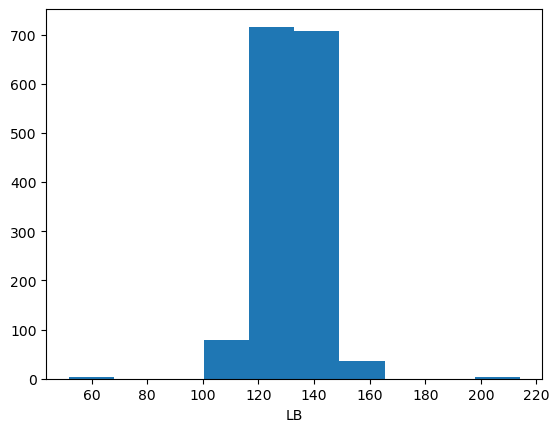

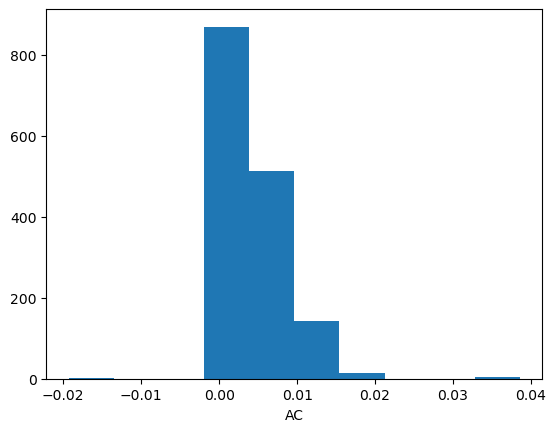

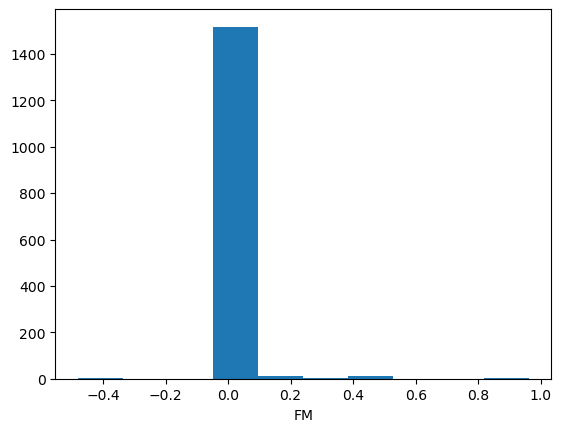

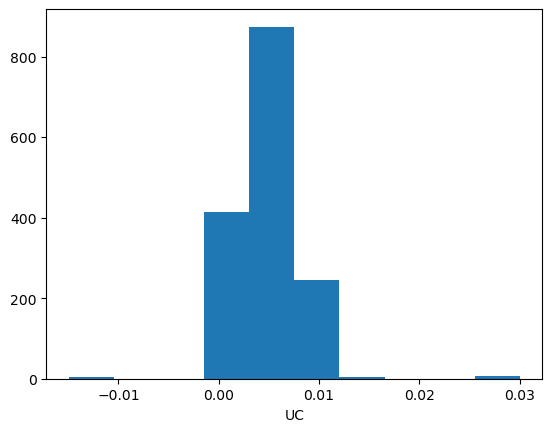

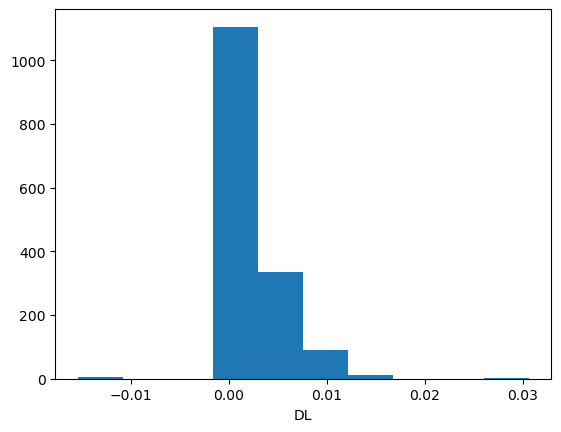

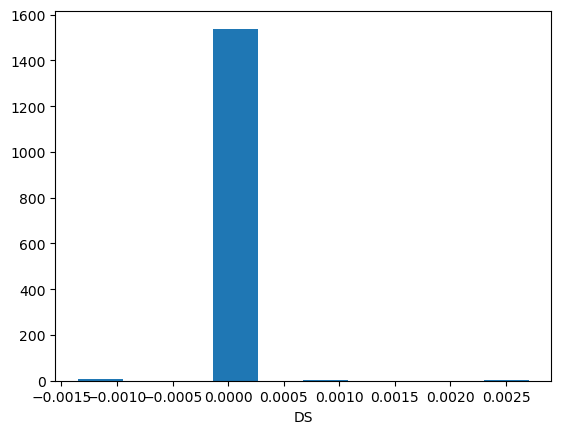

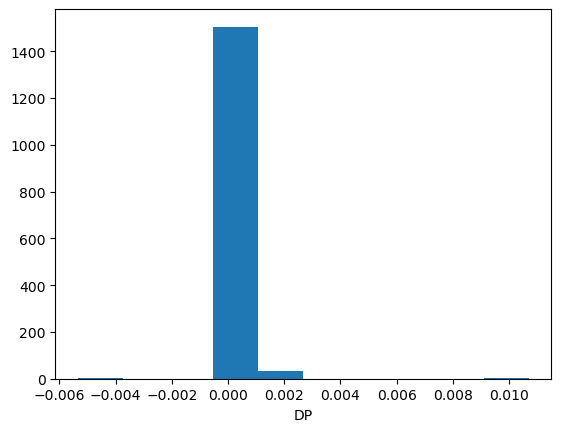

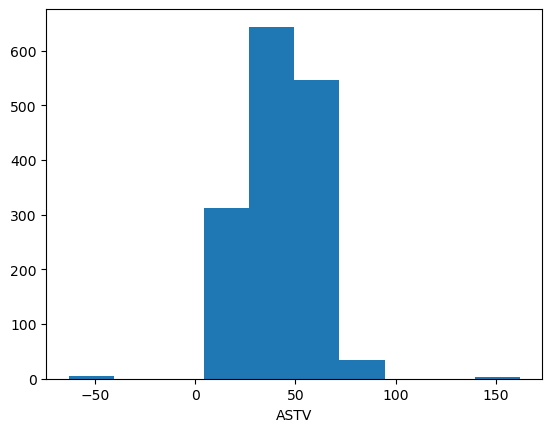

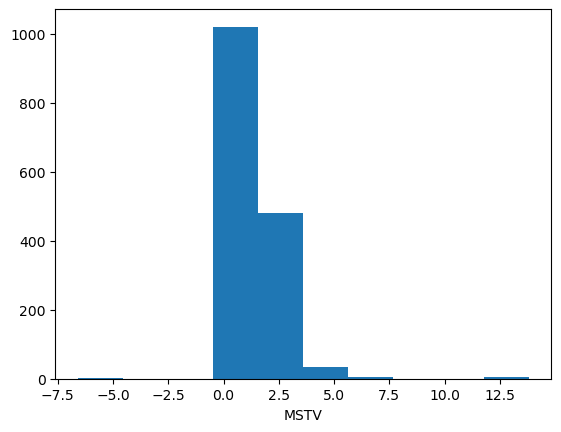

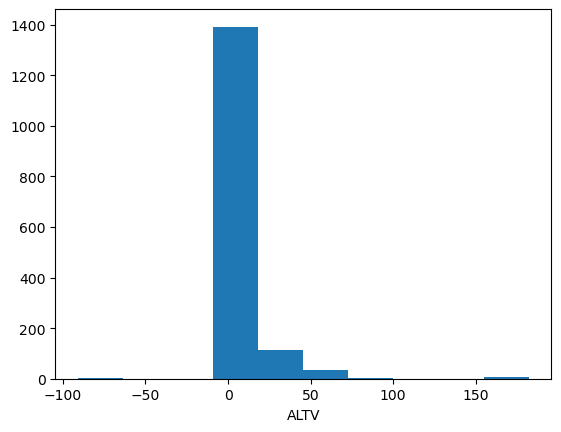

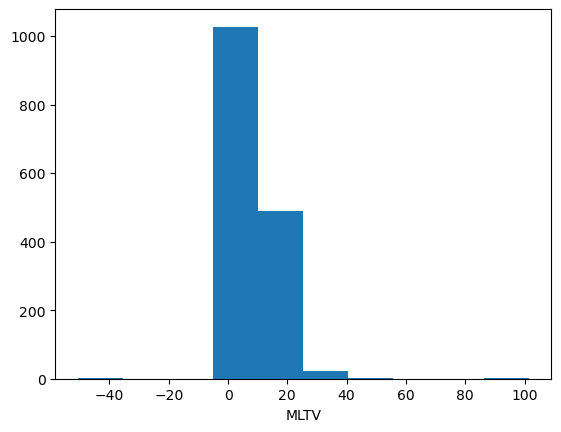

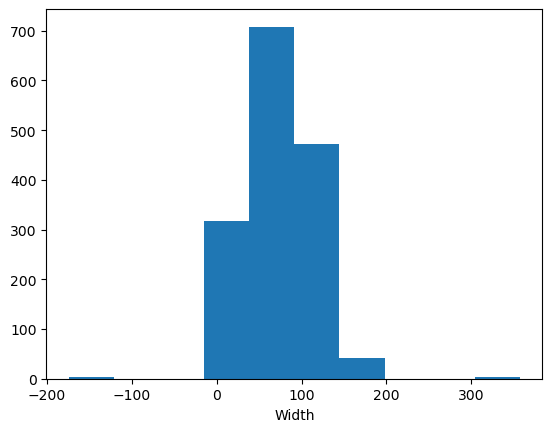

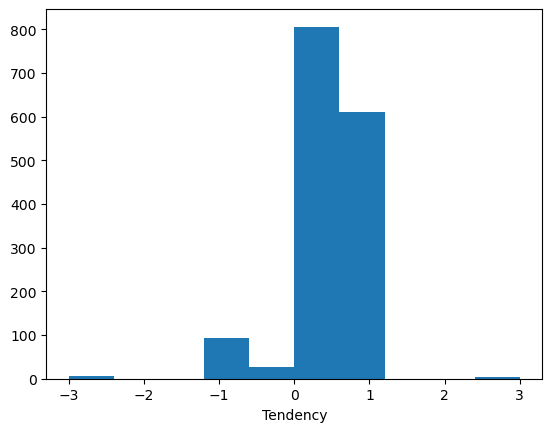

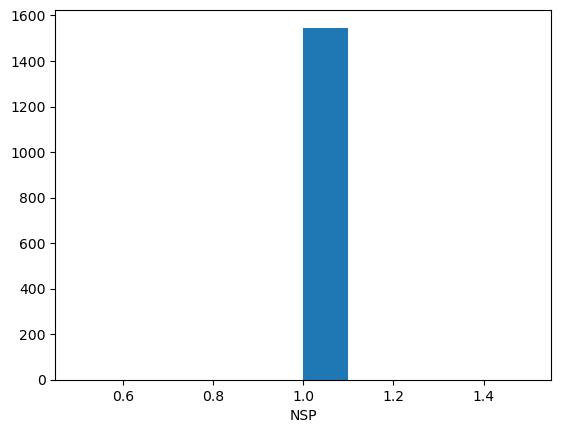

In [80]:
## Histogram of each column 
# gives the pictorical representation of every column data with its frequency of range of data values
for col in no_outliers.columns:
    plt.hist(no_outliers[col])
    plt.xlabel(col)
    plt.show()

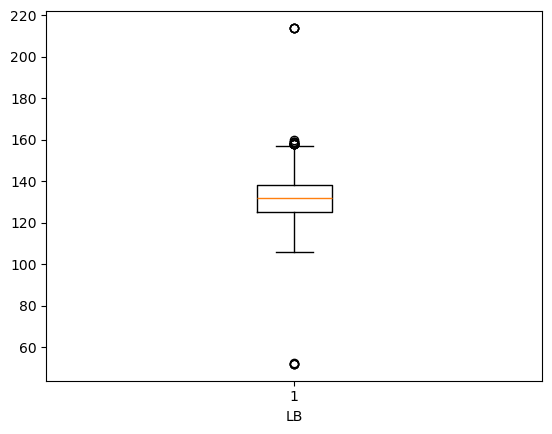

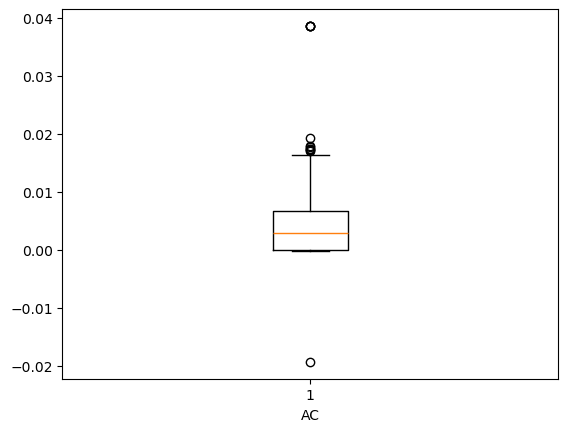

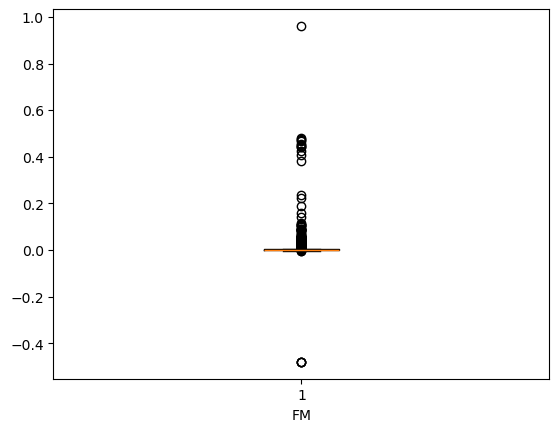

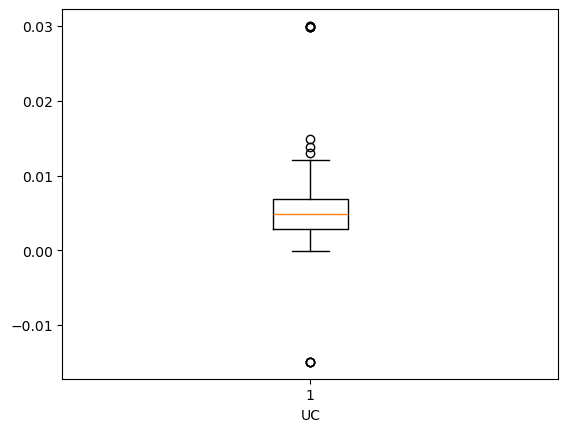

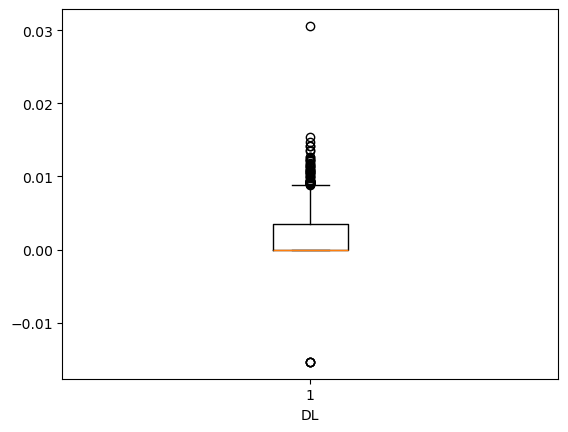

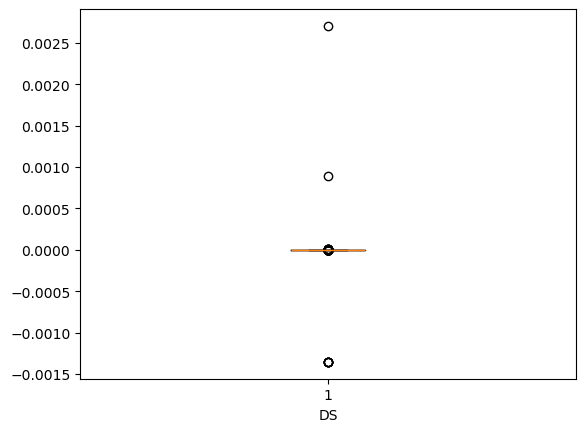

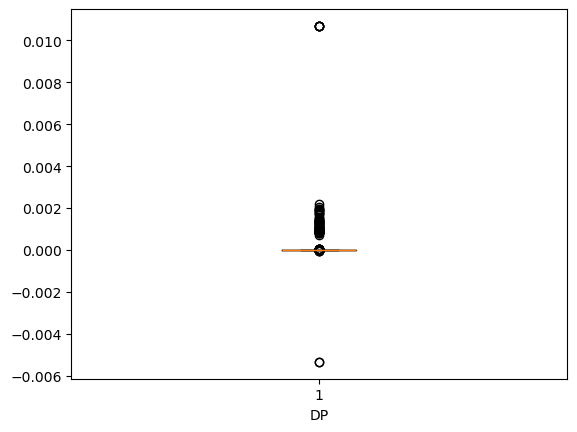

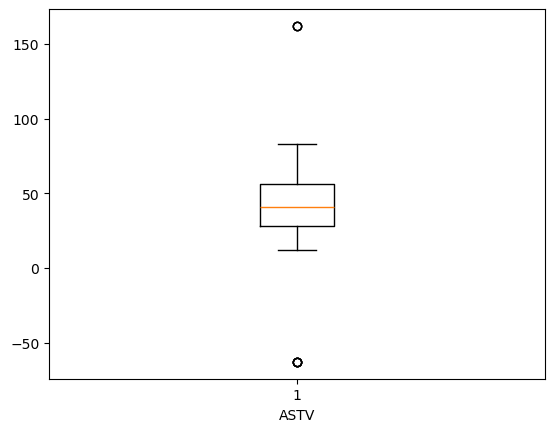

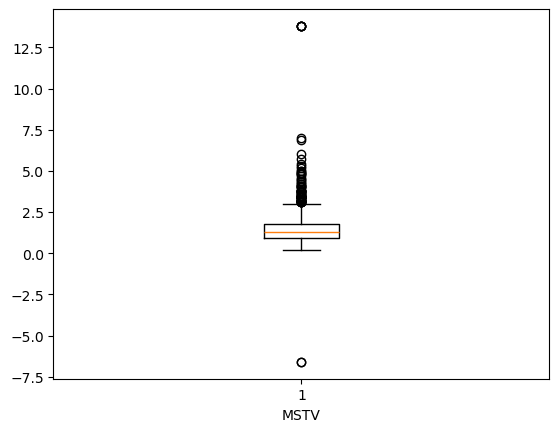

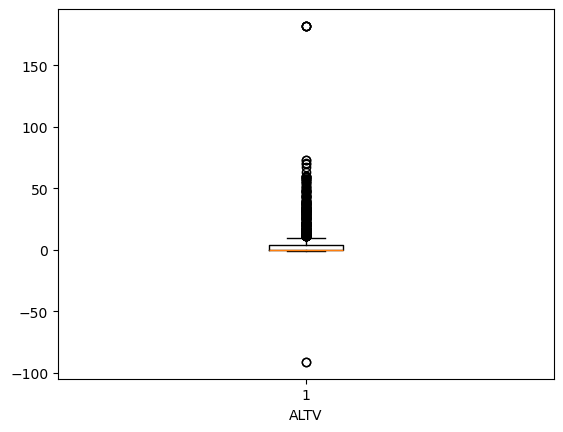

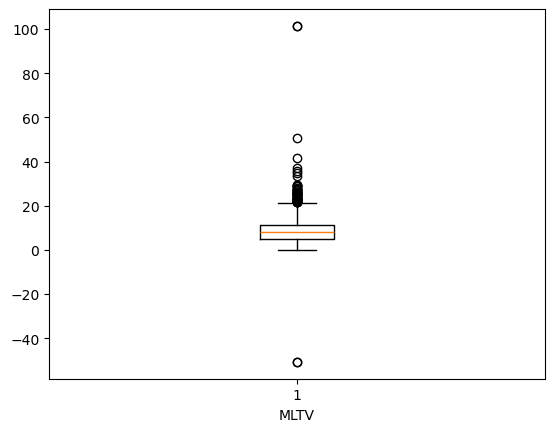

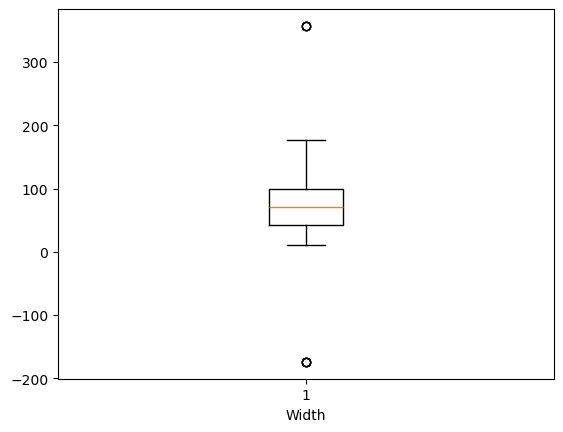

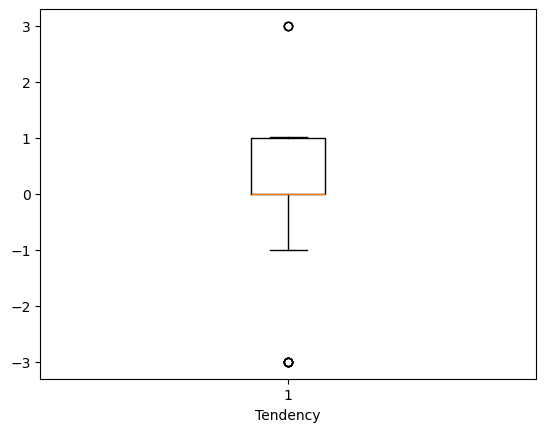

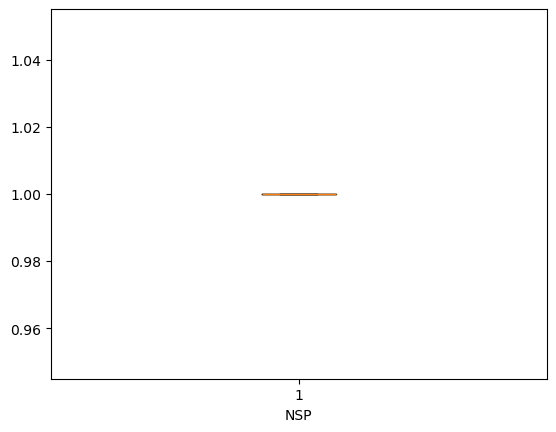

In [82]:
## Boxplot of each data column
# indiactes the presence of outliers 
for col in no_outliers.columns:
    plt.boxplot(no_outliers[col])
    plt.xlabel(col)
    plt.show()

In [16]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [17]:
#### there is no categorical data to implement pie or bar chart

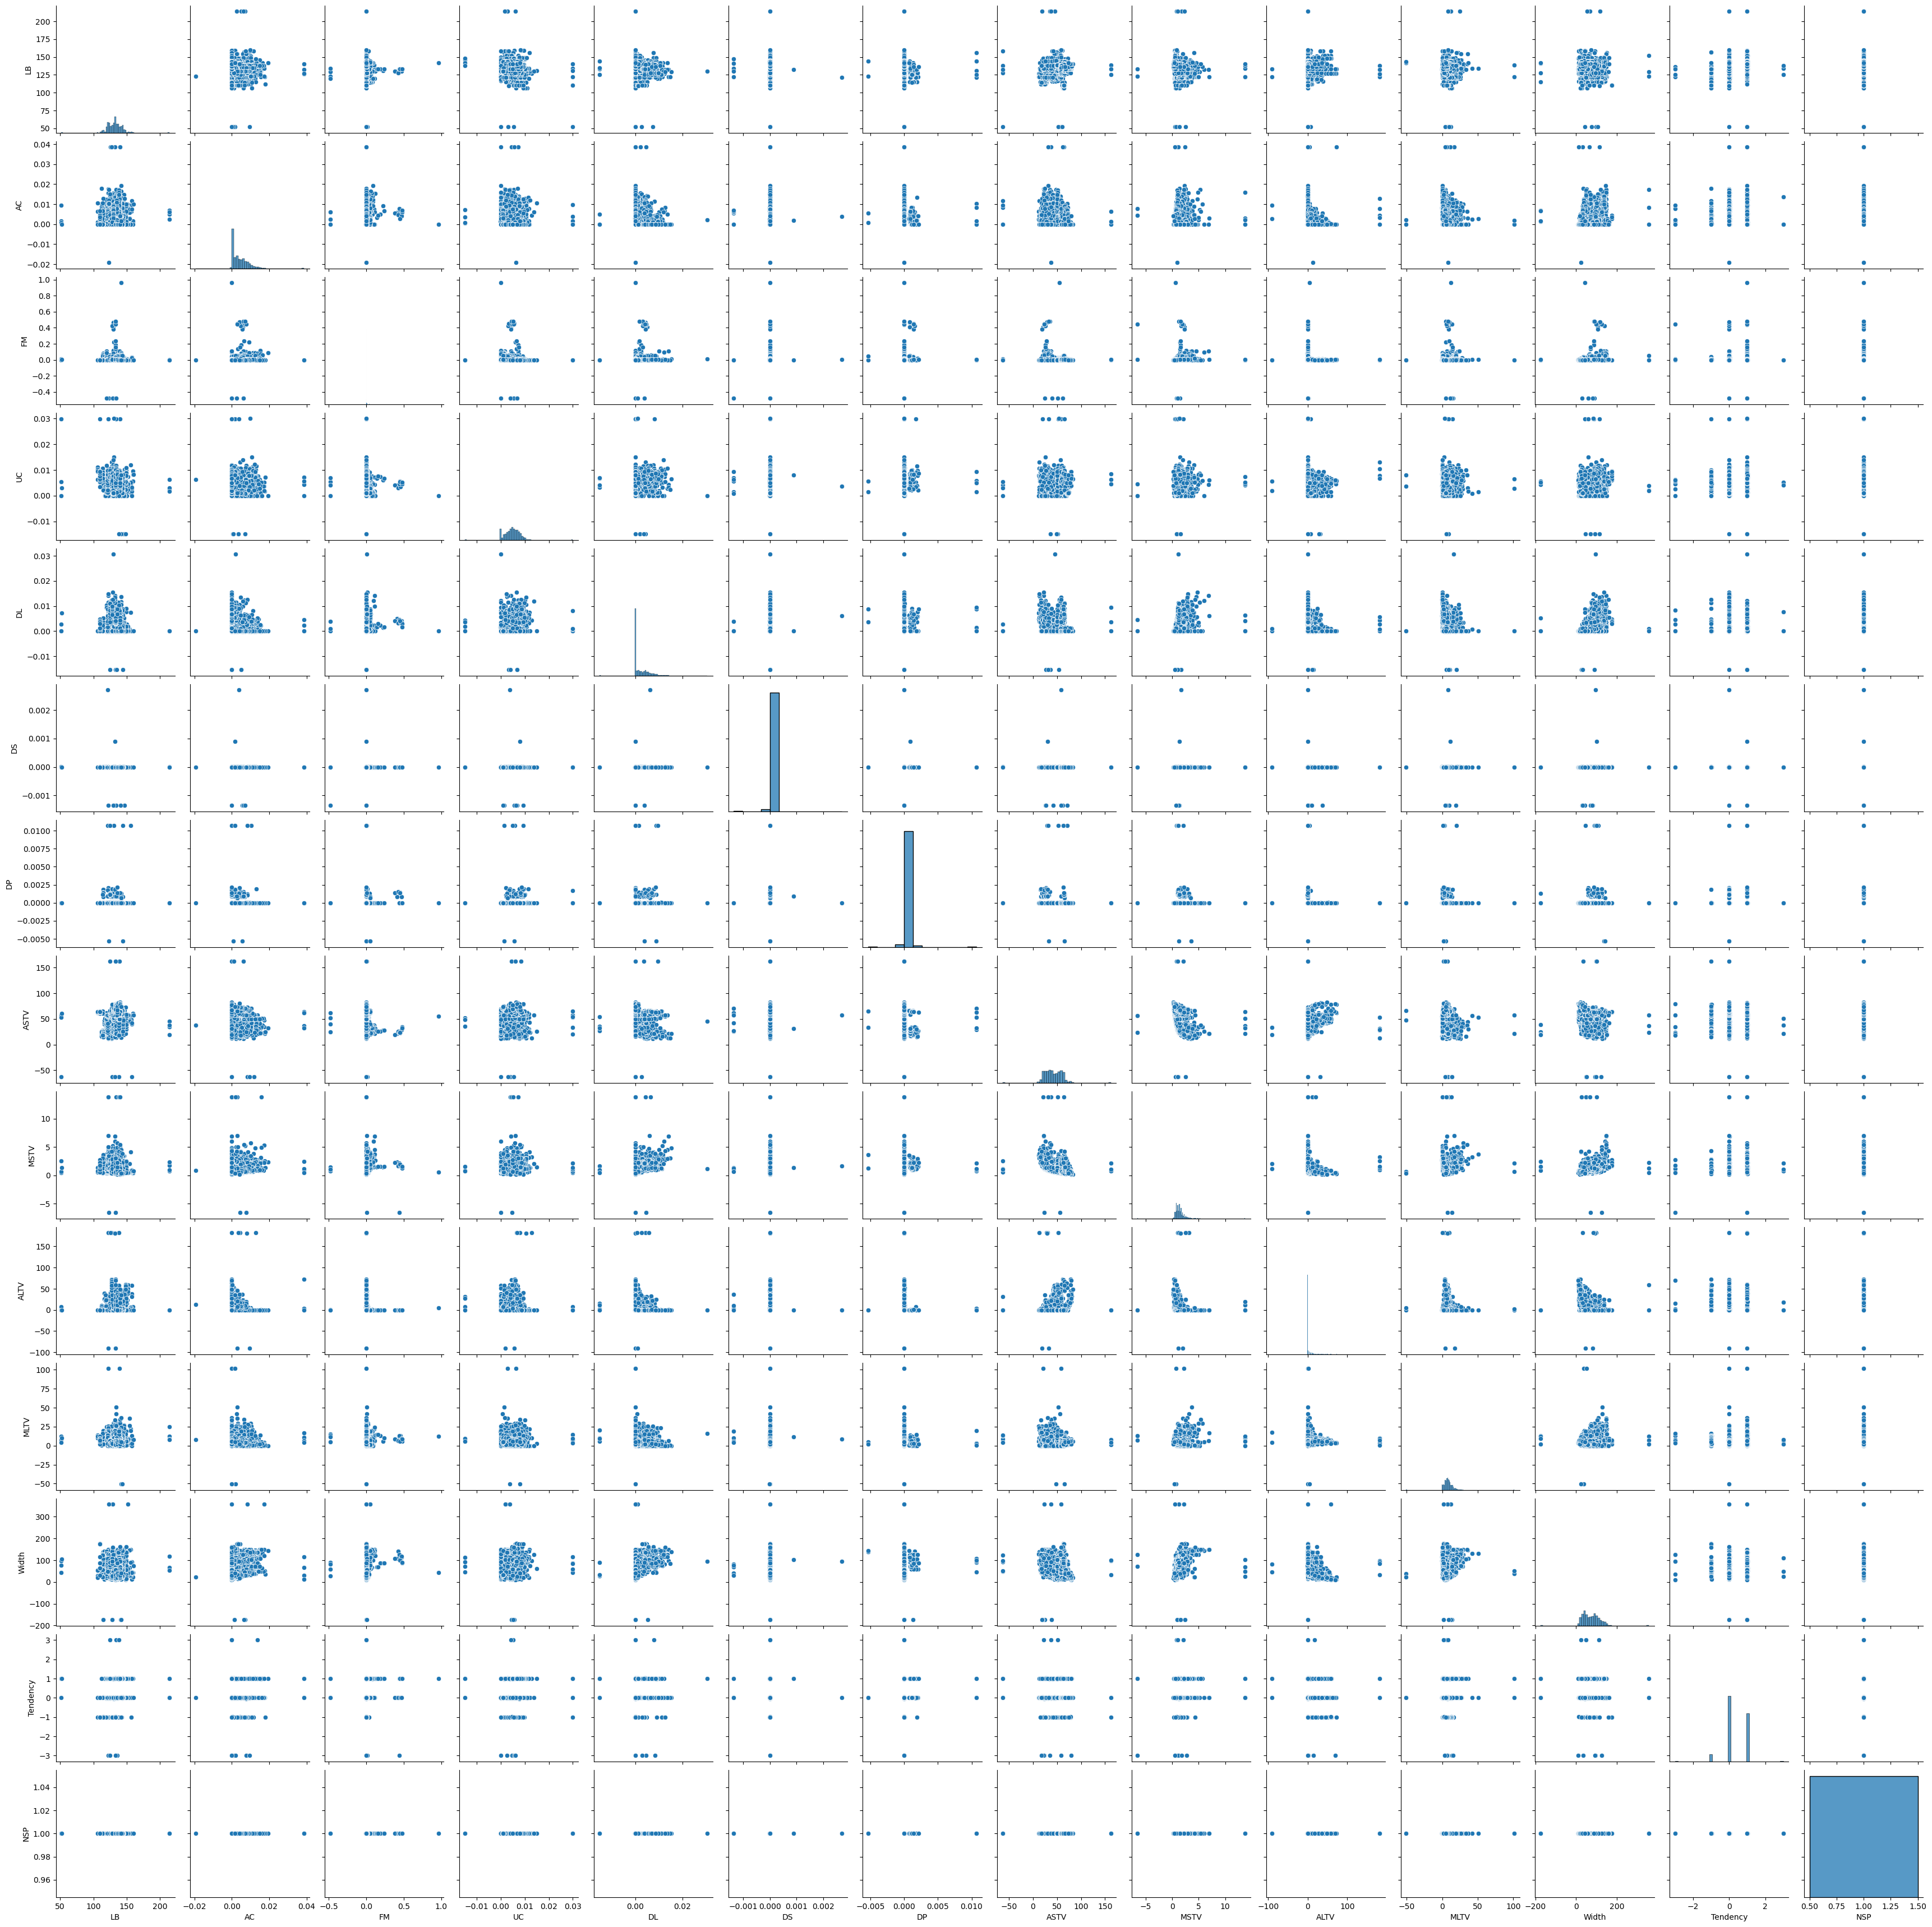

In [84]:
## gives the correlation between all numerical columns like linerly correlated or not etc
sns.pairplot(no_outliers);

<Axes: >

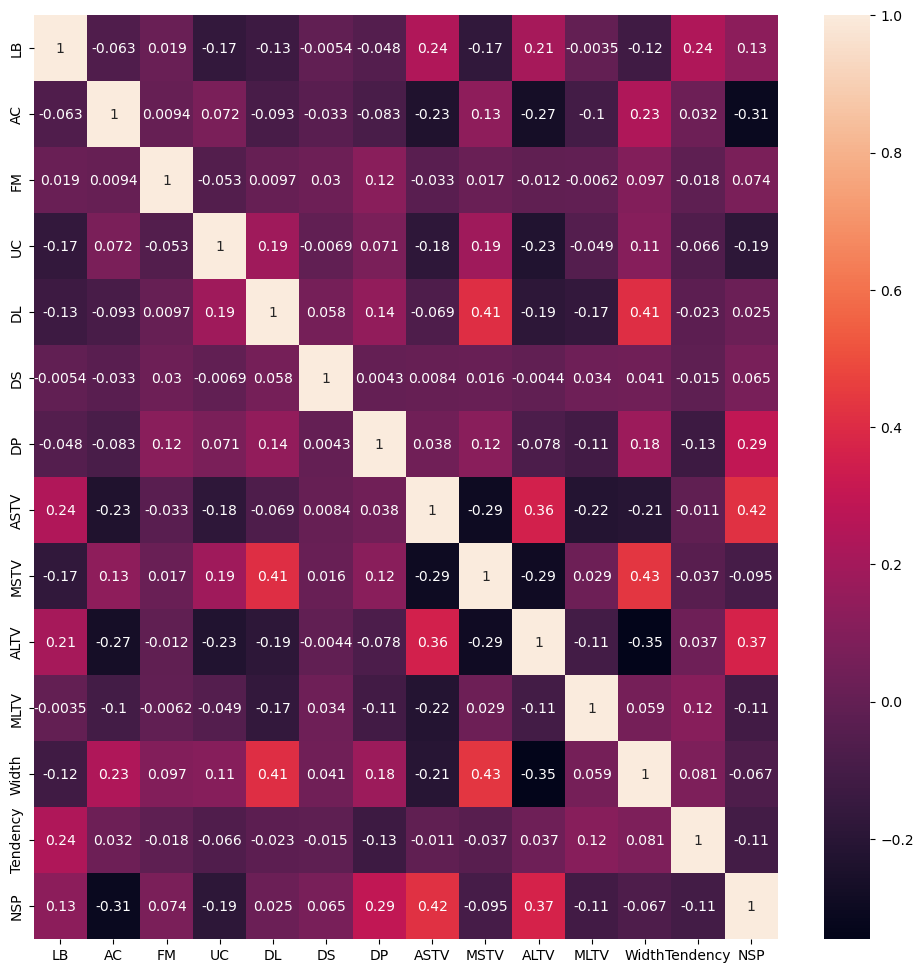

In [85]:
## gives the correlation in terms of colors and corr values
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

<Axes: >

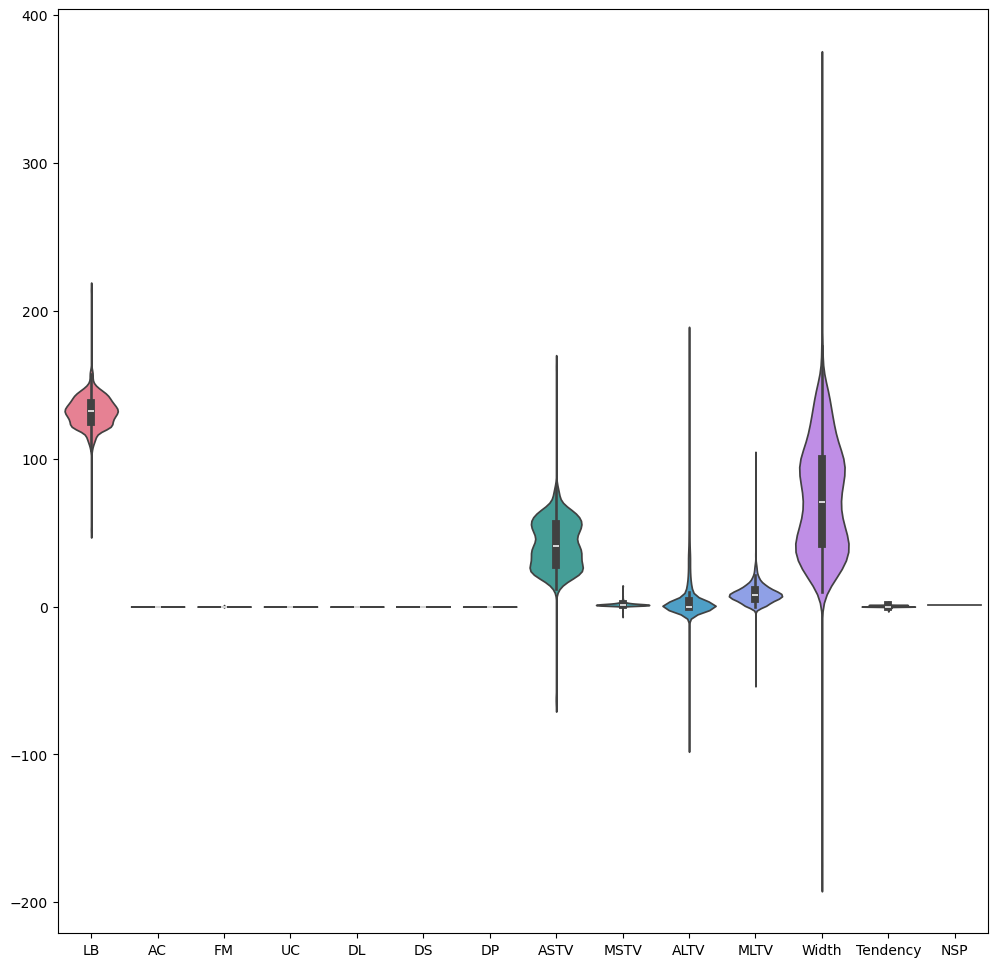

In [69]:
# indicates the presence of outliers
plt.figure(figsize=(12,12))
sns.violinplot(no_outliers)

In [ ]:
## there is some outliers 

In [ ]:
### Conclutions from the process:
## Width and MSTV has higher correlation with each other
## Width ALTV has lower correlation with each other.
## 50% of Baseline Fetal Heart Rate  is between 125 to 138